In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('periods.csv')
df.head()

,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,...,Method,Prevmethod,Methoddate,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM,Timeattemptpreg,BMI
0,nfp8122,1,0,1,0,29,27.33,17,12,12,...,9,,,2,7,7,1,1,0,21.254724111867
1,nfp8122,2,0,1,0,27,,15,12,13,...,,,,,,,,,,
2,nfp8122,3,0,1,0,29,,15,14,,...,,,,,,,,,,
3,nfp8122,4,0,1,0,27,,15,12,13,...,,,,,,,,,,
4,nfp8122,5,0,1,0,28,,16,12,12,...,,,,,,,,,,


In [14]:
df.dtypes

ClientID                object
CycleNumber              int64
Group                    int64
CycleWithPeakorNot       int64
ReproductiveCategory     int64
                         ...  
Spousesame              object
SpousesameM             object
Timeattemptpreg         object
BMI                     object
Healthy                   bool
Length: 81, dtype: object

In [16]:
df.shape

(1665, 81)

In [22]:
for cols in df.columns:
    print(f"{cols} : \n {df[cols].unique()} \n \n")

ClientID : 
 ['nfp8122' 'nfp8114' 'nfp8109' 'nfp8107' 'nfp8106' 'nfp8024' 'nfp8020'
 'nfp8026' 'nfp8030' 'nfp8031' 'nfp8032' 'nfp8034' 'nfp8036' 'nfp8040'
 'nfp8041' 'nfp8042' 'nfp8043' 'nfp8045' 'nfp8046' 'nfp8047' 'nfp8049'
 'nfp8050' 'nfp8051' 'nfp8057' 'nfp8058' 'nfp8060' 'nfp8062' 'nfp8063'
 'nfp8064' 'nfp8066' 'nfp8068' 'nfp8069' 'nfp8072' 'nfp8073' 'nfp8074'
 'nfp8076' 'nfp8079' 'nfp8080' 'nfp8083' 'nfp8085' 'nfp8087' 'nfp8091'
 'nfp8094' 'nfp8099' 'nfp8100' 'nfp8101' 'nfp8102' 'nfp8110' 'nfp8113'
 'nfp8116' 'nfp8123' 'nfp8124' 'nfp8129' 'nfp8131' 'nfp8133' 'nfp8137'
 'nfp8140' 'nfp8143' 'nfp8144' 'nfp8149' 'nfp8150' 'nfp8152' 'nfp8154'
 'nfp8155' 'nfp8159' 'nfp8161' 'nfp8164' 'nfp8165' 'nfp8168' 'nfp8172'
 'nfp8173' 'nfp8174' 'nfp8176' 'nfp8177' 'nfp8178' 'nfp8179' 'nfp8184'
 'nfp8186' 'nfp8187' 'nfp8188' 'nfp8189' 'nfp8190' 'nfp8192' 'nfp8193'
 'nfp8195' 'nfp8196' 'nfp8197' 'nfp8200' 'nfp8206' 'nfp8207' 'nfp8209'
 'nfp8210' 'nfp8211' 'nfp8212' 'nfp8218' 'nfp8221' 'nfp8223' 'nf

Number of women: 159
Number of reproductively healthy women: 156
Proportion of reproductively healthy women: 0.98


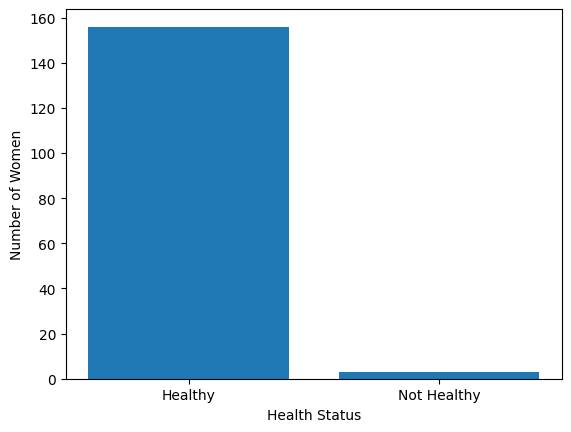

In [20]:
import matplotlib.pyplot as plt
n_women = df['ClientID'].nunique()
df['Healthy'] = (df['LengthofCycle'] >= 26) & (df['LengthofCycle'] <= 34)
n_healthy = df[df['Healthy'] == True]['ClientID'].nunique()
proportion = n_healthy / n_women
print("Number of women:", n_women)
print("Number of reproductively healthy women:", n_healthy)
print("Proportion of reproductively healthy women: {:.2f}".format(proportion))
plt.bar(["Healthy", "Not Healthy"], [n_healthy, n_women - n_healthy])
plt.xlabel("Health Status")
plt.ylabel("Number of Women")
plt.show()

In [24]:
df =df.replace(' ', np.nan)
df.isnull().sum()

ClientID                   0
CycleNumber                0
Group                      0
CycleWithPeakorNot         0
ReproductiveCategory       0
                        ... 
Spousesame              1523
SpousesameM             1523
Timeattemptpreg         1523
BMI                     1534
Healthy                    0
Length: 81, dtype: int64

In [26]:
cols_with_missing_cols= []
cols_without_missing_values = []
for cols in df.columns:   
    if df[cols].isnull().sum() == 0:
        cols_without_missing_values.append(cols)
        
    else:
        cols_with_missing_cols.append(cols)
        
print(f'Number of Columns without any missing values:  {len(cols_without_missing_values)}\n')
print(f'Number of Columns with missing values :  {len(cols_with_missing_cols)}')

Number of Columns without any missing values:  7

Number of Columns with missing values :  74


In [28]:
null = df.isnull().sum().sort_values(ascending=False)
null_per = ((df.isnull().sum()) / (df.shape[0])).sort_values(ascending=False)*100.
null_values = pd.DataFrame({
    "Column Name": null.index,
    "Total Number of Missing Values": null.values,
    "Missing Values in Percentage": null_per.values
})


C:\Users\jayan\AppData\Local\Temp\ipykernel_12308\1770444102.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=null_values[null_values["Missing Values in Percentage"] >= 50], x="Missing Values in Percentage", y="Column Name", palette="viridis")


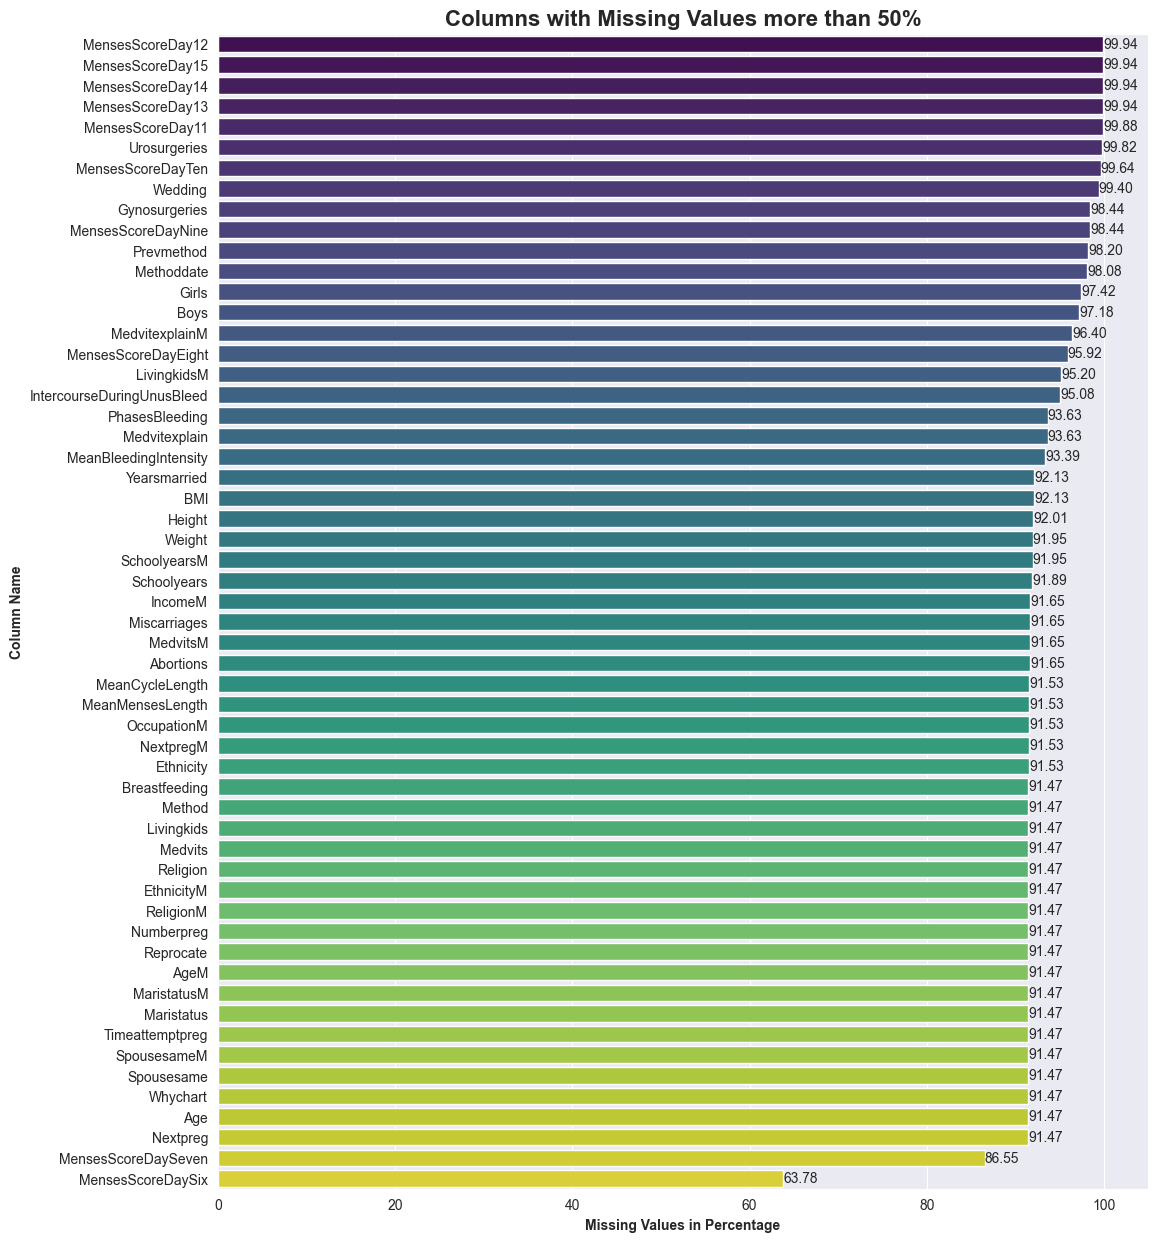

In [32]:
import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize=(12, 15))

ax = sns.barplot(data=null_values[null_values["Missing Values in Percentage"] >= 50], x="Missing Values in Percentage", y="Column Name", palette="viridis")

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.title('Columns with Missing Values more than 50%',fontsize=16, fontweight='bold')
plt.xlabel('Missing Values in Percentage',fontweight='bold')
plt.ylabel('Column Name',fontweight='bold')
plt.show()

C:\Users\jayan\AppData\Local\Temp\ipykernel_12308\2914675841.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=null_values[null_values["Missing Values in Percentage"]< 50], x="Missing Values in Percentage", y="Column Name", palette="viridis")


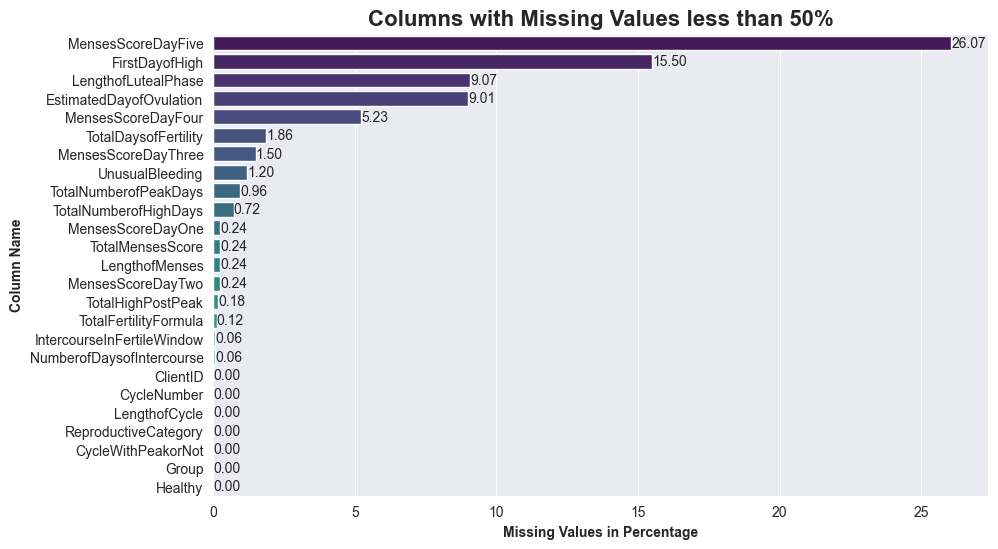

In [34]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))

ax = sns.barplot(data=null_values[null_values["Missing Values in Percentage"]< 50], x="Missing Values in Percentage", y="Column Name", palette="viridis")

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.title('Columns with Missing Values less than 50%', fontsize=16, fontweight='bold')
plt.xlabel('Missing Values in Percentage', fontweight='bold')
plt.ylabel('Column Name',fontweight='bold')
plt.show()

In [36]:
remove_cols = null_values[null_values["Missing Values in Percentage"] >= 50]["Column Name"].tolist()
df = df.drop(columns=remove_cols)

In [44]:
df.dtypes

CycleNumber                    int64
Group                          int64
CycleWithPeakorNot             int64
ReproductiveCategory           int64
LengthofCycle                  int64
EstimatedDayofOvulation       object
LengthofLutealPhase           object
FirstDayofHigh                object
TotalNumberofHighDays         object
TotalHighPostPeak             object
TotalNumberofPeakDays         object
TotalDaysofFertility          object
TotalFertilityFormula         object
LengthofMenses                object
MensesScoreDayOne             object
MensesScoreDayTwo             object
MensesScoreDayThree           object
MensesScoreDayFour            object
MensesScoreDayFive            object
TotalMensesScore              object
NumberofDaysofIntercourse     object
IntercourseInFertileWindow    object
UnusualBleeding               object
Healthy                         bool
dtype: object

In [46]:
df.shape

(1665, 24)

In [48]:
categorical_columns = df.select_dtypes(include= object).columns
categorical_columns

Index(['EstimatedDayofOvulation', 'LengthofLutealPhase', 'FirstDayofHigh',
       'TotalNumberofHighDays', 'TotalHighPostPeak', 'TotalNumberofPeakDays',
       'TotalDaysofFertility', 'TotalFertilityFormula', 'LengthofMenses',
       'MensesScoreDayOne', 'MensesScoreDayTwo', 'MensesScoreDayThree',
       'MensesScoreDayFour', 'MensesScoreDayFive', 'TotalMensesScore',
       'NumberofDaysofIntercourse', 'IntercourseInFertileWindow',
       'UnusualBleeding'],
      dtype='object')

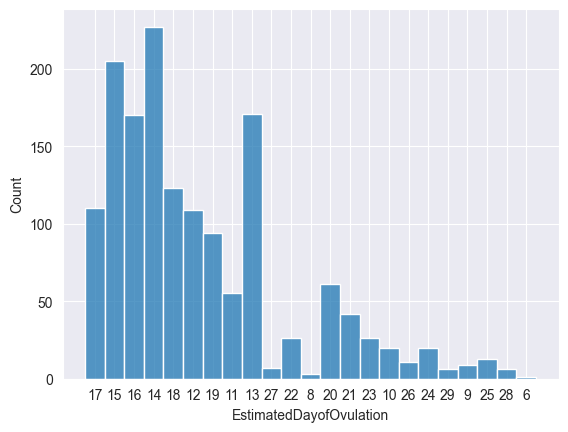

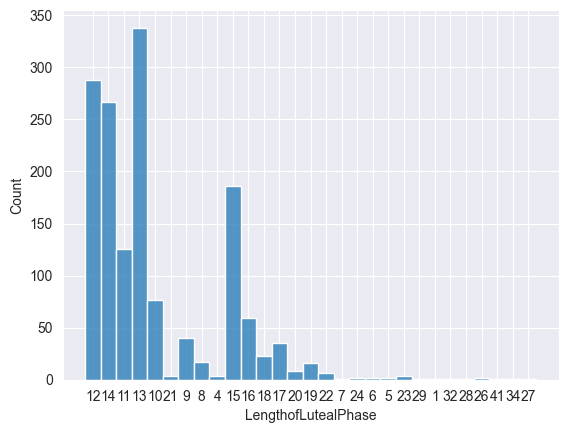

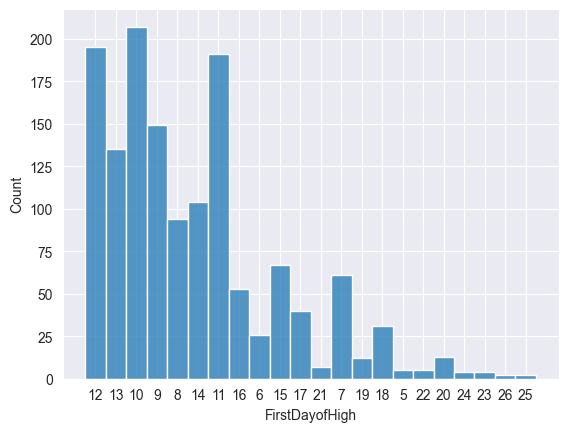

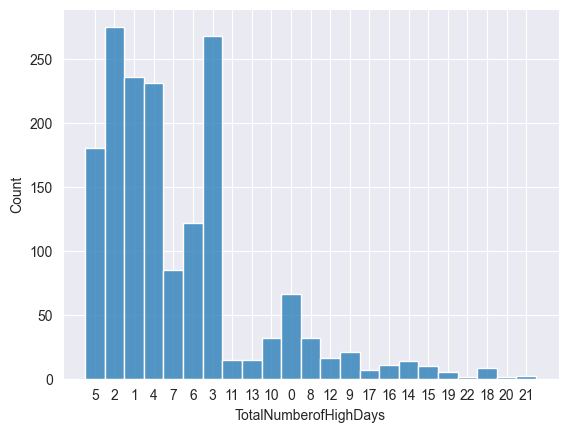

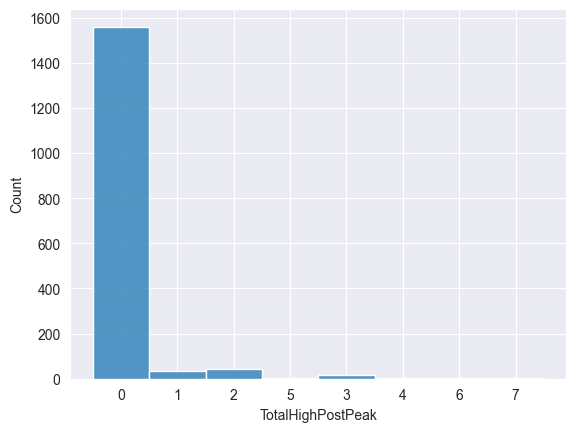

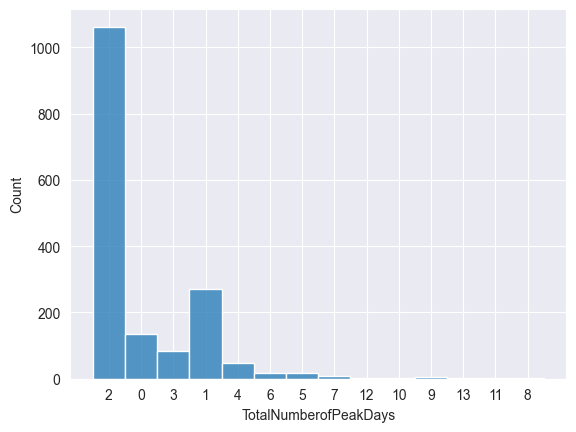

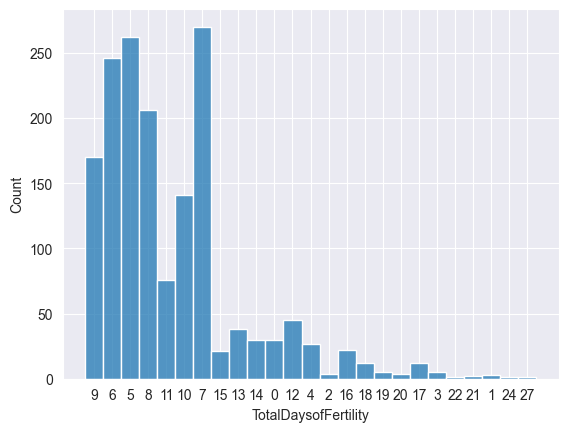

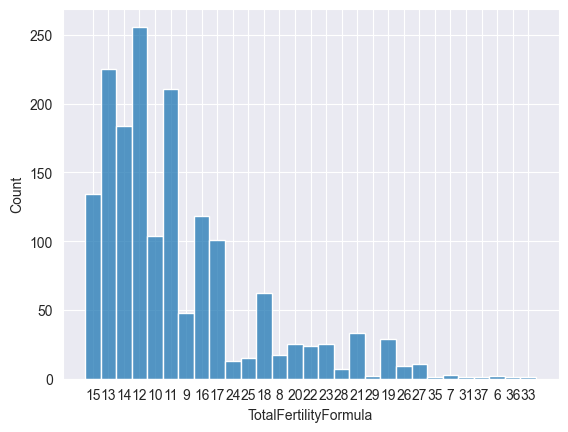

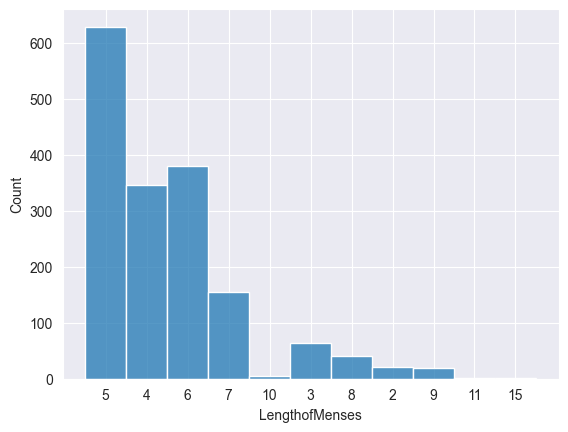

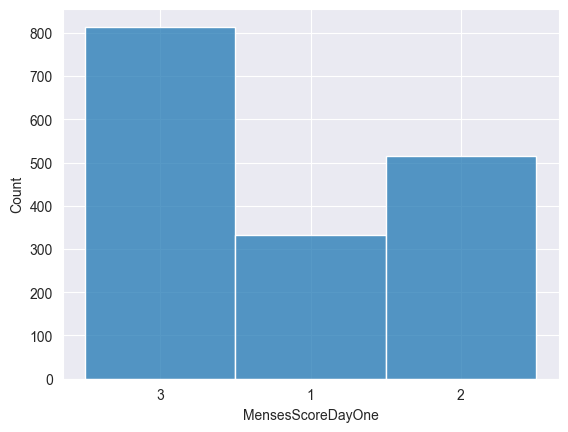

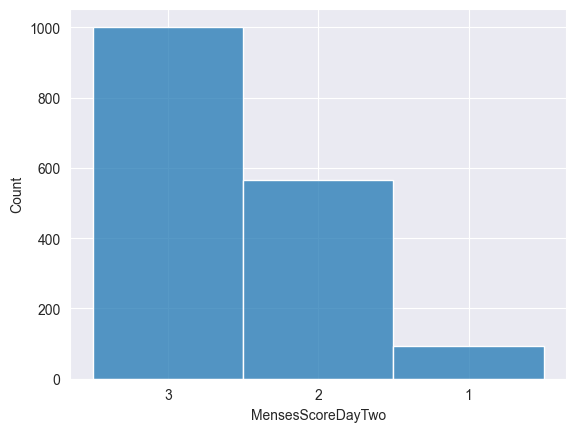

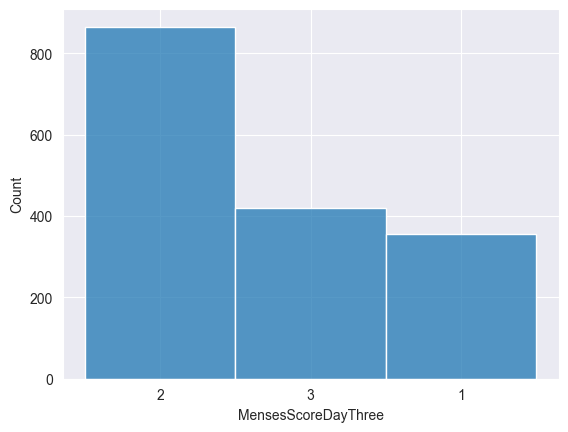

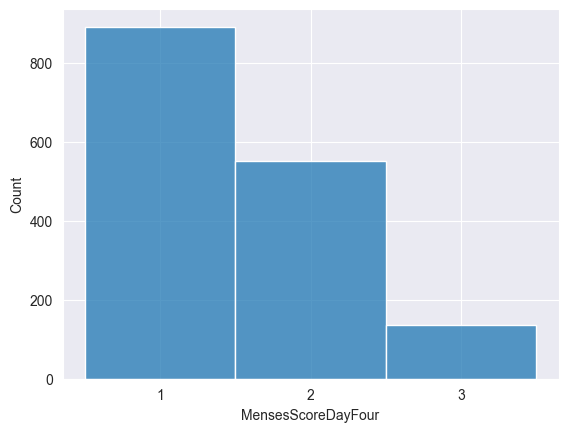

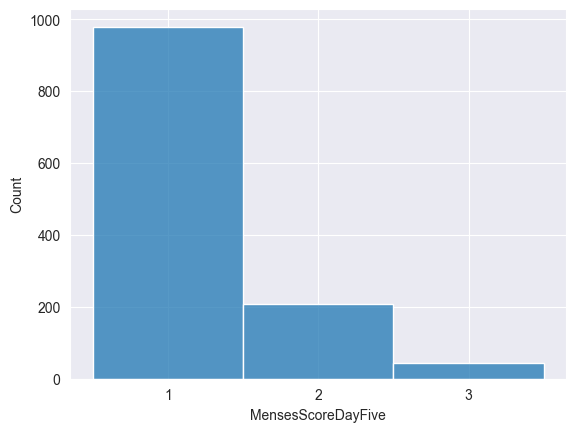

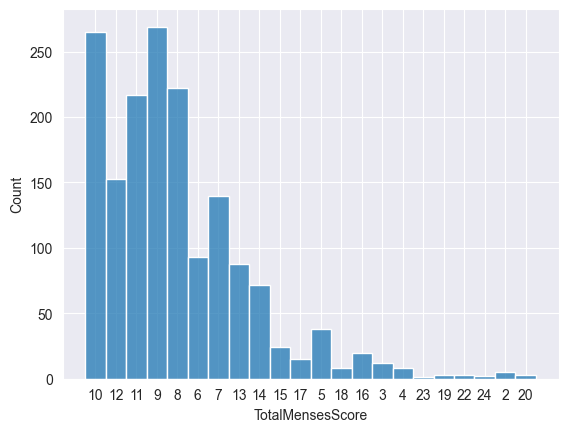

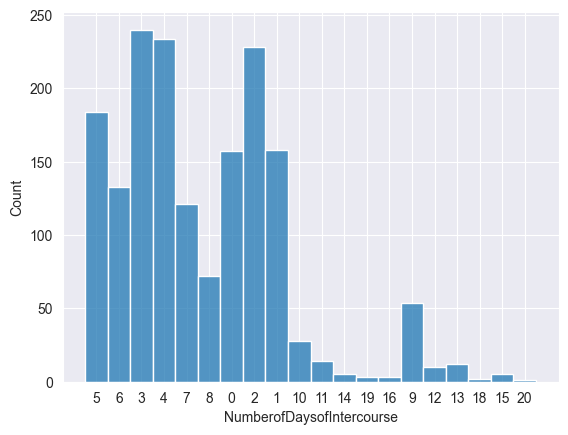

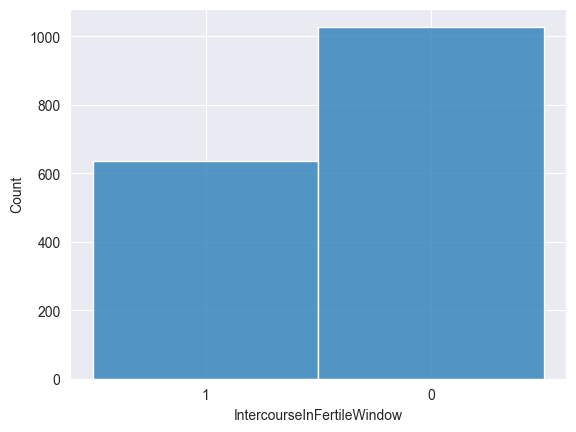

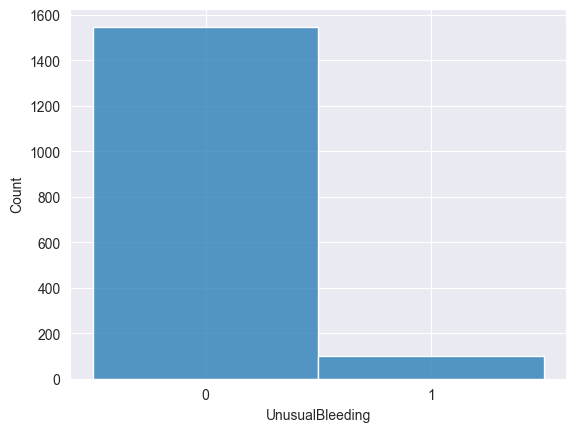

In [50]:
for i in categorical_columns:    
    sns.histplot(data=df[i])
    plt.show()

In [54]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
encoder = LabelEncoder()
for cols in categorical_columns:       
        df[cols] = pd.to_numeric(df[cols])
        df[cols] = encoder.fit_transform(df[cols])

In [56]:
for i in df.columns:
    if ( df[i].isnull().sum() ) > 100:
        df[i]= df[i].fillna(df[i].mean())

In [58]:
df

,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,TotalHighPostPeak,...,MensesScoreDayOne,MensesScoreDayTwo,MensesScoreDayThree,MensesScoreDayFour,MensesScoreDayFive,TotalMensesScore,NumberofDaysofIntercourse,IntercourseInFertileWindow,UnusualBleeding,Healthy
0,1,0,1,0,29,10,9,7,5,0,...,2,2,1,0,0,8,5,1,0,True
1,2,0,1,0,27,8,9,8,2,0,...,2,2,1,0,0,8,6,1,0,True
2,3,0,1,0,29,8,11,22,1,0,...,2,2,1,0,0,8,5,1,0,True
3,4,0,1,0,27,8,9,8,2,0,...,2,2,2,1,0,10,3,0,0,True
4,5,0,1,0,28,9,9,7,4,0,...,2,2,1,1,0,9,5,1,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,7,1,1,0,29,12,7,8,5,0,...,1,2,2,1,1,13,8,0,1,True
1661,8,1,1,0,28,10,8,7,3,0,...,2,2,1,0,0,9,11,1,0,True
1662,9,1,1,0,28,9,9,6,4,0,...,2,1,1,0,0,7,7,0,0,True
1663,10,1,1,1,40,20,10,8,13,0,...,1,2,2,1,0,10,3,0,0,False


In [68]:
df.isnull().sum()

CycleNumber                   0
Group                         0
CycleWithPeakorNot            0
ReproductiveCategory          0
LengthofCycle                 0
EstimatedDayofOvulation       0
LengthofLutealPhase           0
FirstDayofHigh                0
TotalNumberofHighDays         0
TotalHighPostPeak             0
TotalNumberofPeakDays         0
TotalDaysofFertility          0
TotalFertilityFormula         0
LengthofMenses                0
MensesScoreDayOne             0
MensesScoreDayTwo             0
MensesScoreDayThree           0
MensesScoreDayFour            0
MensesScoreDayFive            0
TotalMensesScore              0
NumberofDaysofIntercourse     0
IntercourseInFertileWindow    0
UnusualBleeding               0
Healthy                       0
dtype: int64

In [70]:
df.drop_duplicates()

,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,TotalHighPostPeak,...,MensesScoreDayOne,MensesScoreDayTwo,MensesScoreDayThree,MensesScoreDayFour,MensesScoreDayFive,TotalMensesScore,NumberofDaysofIntercourse,IntercourseInFertileWindow,UnusualBleeding,Healthy
0,1,0,1,0,29,10,9,7,5,0,...,2,2,1,0,0,8,5,1,0,True
1,2,0,1,0,27,8,9,8,2,0,...,2,2,1,0,0,8,6,1,0,True
2,3,0,1,0,29,8,11,22,1,0,...,2,2,1,0,0,8,5,1,0,True
3,4,0,1,0,27,8,9,8,2,0,...,2,2,2,1,0,10,3,0,0,True
4,5,0,1,0,28,9,9,7,4,0,...,2,2,1,1,0,9,5,1,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,7,1,1,0,29,12,7,8,5,0,...,1,2,2,1,1,13,8,0,1,True
1661,8,1,1,0,28,10,8,7,3,0,...,2,2,1,0,0,9,11,1,0,True
1662,9,1,1,0,28,9,9,6,4,0,...,2,1,1,0,0,7,7,0,0,True
1663,10,1,1,1,40,20,10,8,13,0,...,1,2,2,1,0,10,3,0,0,False


In [72]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CycleNumber,1665.0,8.040841,6.593686,1.0,3.0,7.0,11.0,45.0
Group,1665.0,0.382583,0.486164,0.0,0.0,0.0,1.0,1.0
CycleWithPeakorNot,1665.0,0.912312,0.282925,0.0,1.0,1.0,1.0,1.0
ReproductiveCategory,1665.0,0.055255,0.479706,0.0,0.0,0.0,0.0,9.0
LengthofCycle,1665.0,29.299099,3.887932,18.0,27.0,29.0,31.0,54.0
EstimatedDayofOvulation,1665.0,10.228228,5.254078,0.0,7.0,9.0,12.0,23.0
LengthofLutealPhase,1665.0,11.957357,5.911200,0.0,9.0,10.0,12.0,29.0
FirstDayofHigh,1665.0,9.123123,6.274460,0.0,5.0,7.0,11.0,22.0
TotalNumberofHighDays,1665.0,4.383183,3.833958,0.0,2.0,3.0,5.0,23.0
TotalHighPostPeak,1665.0,0.147748,0.697546,0.0,0.0,0.0,0.0,8.0


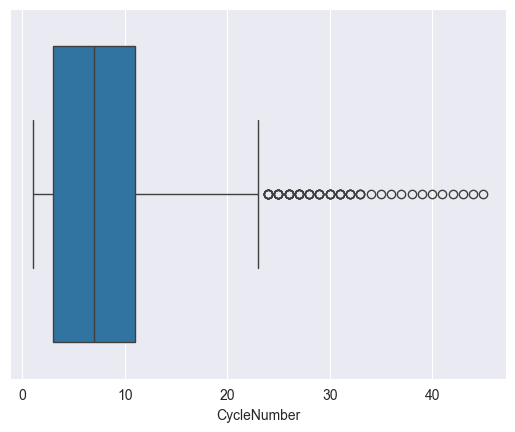

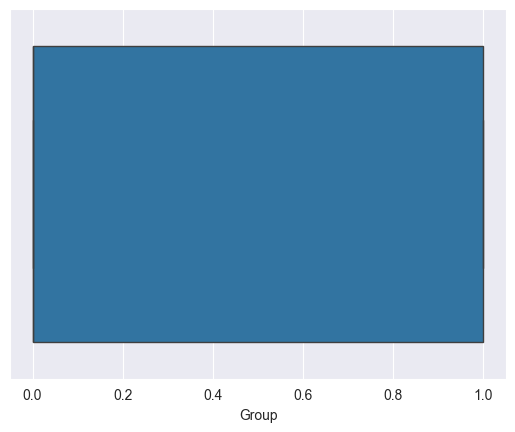

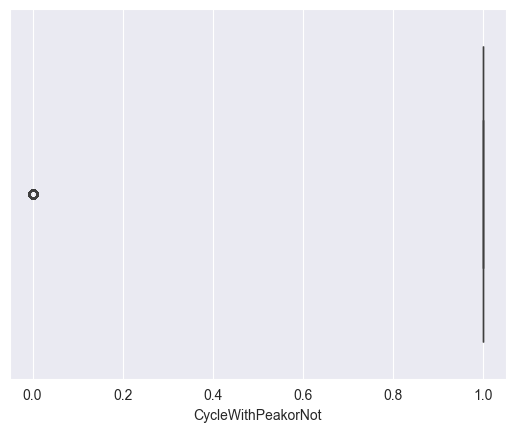

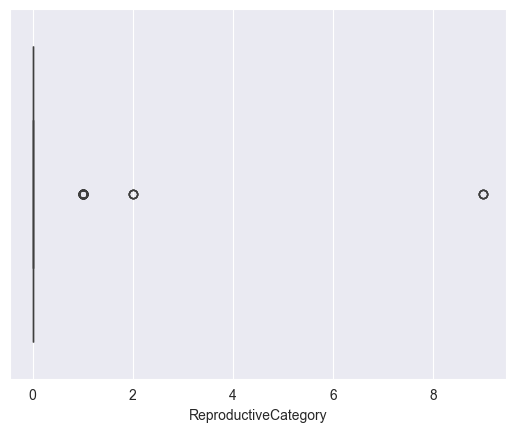

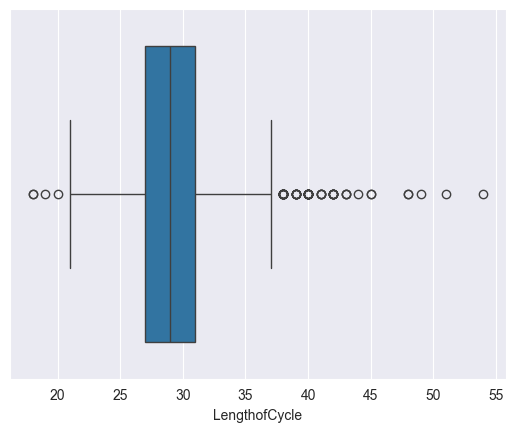

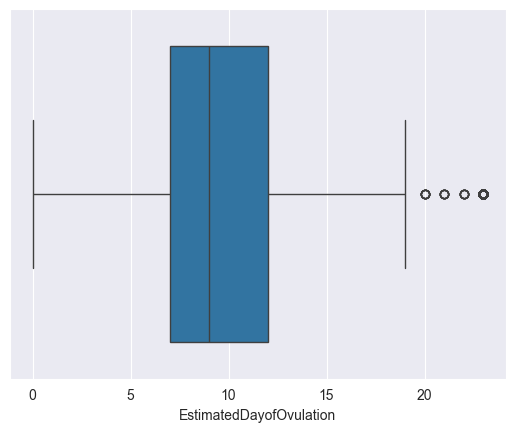

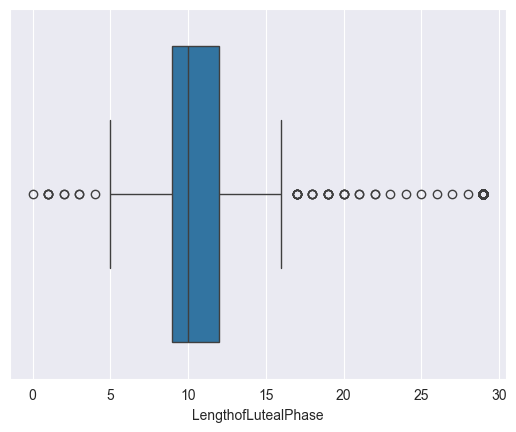

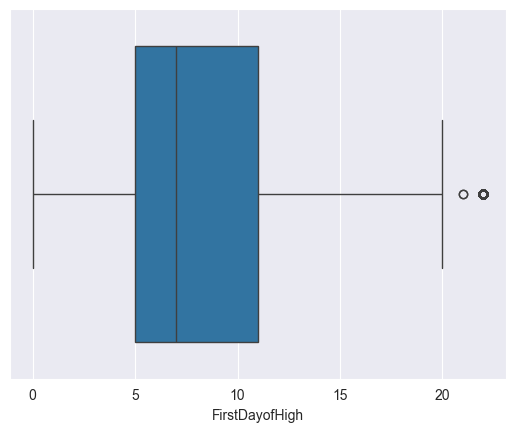

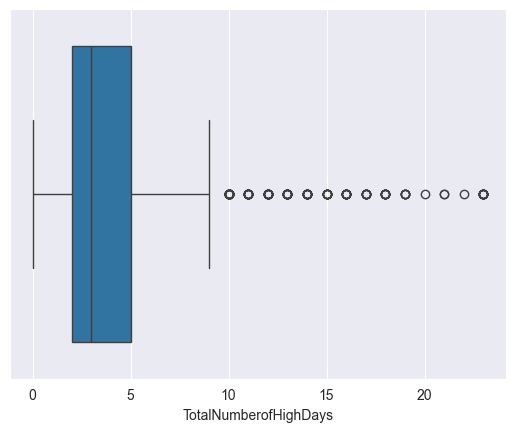

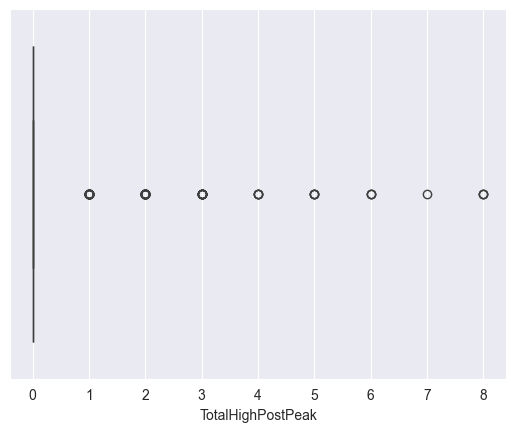

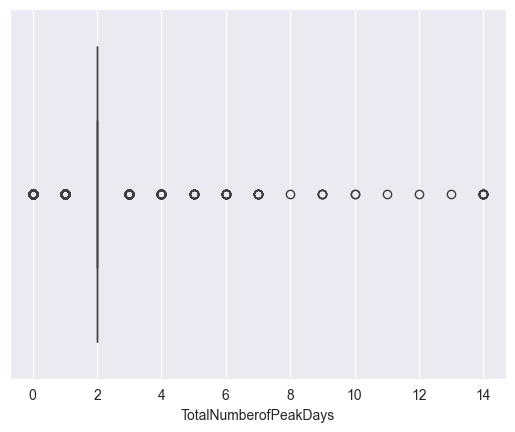

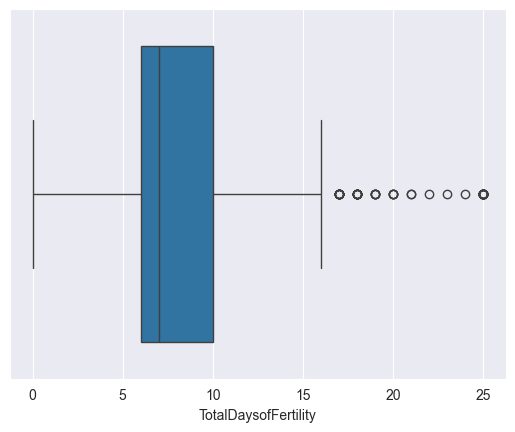

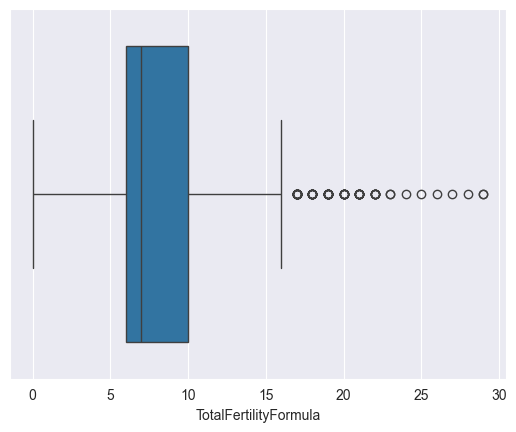

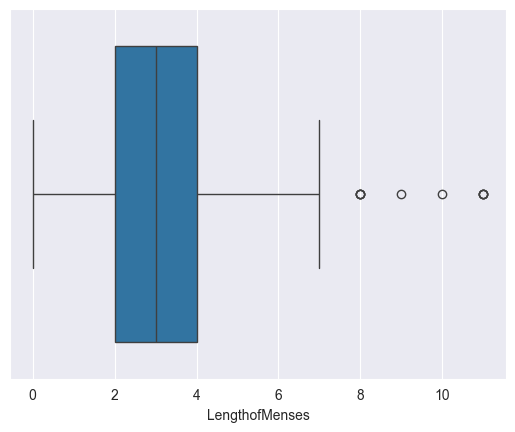

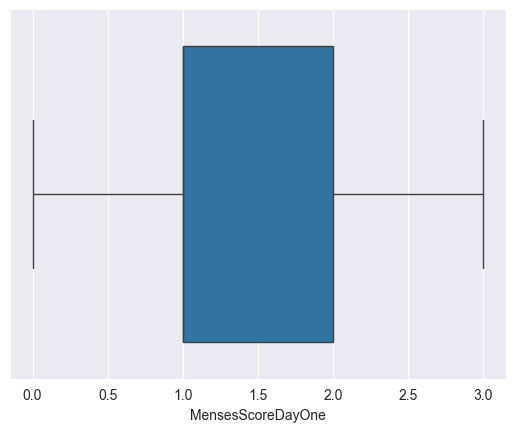

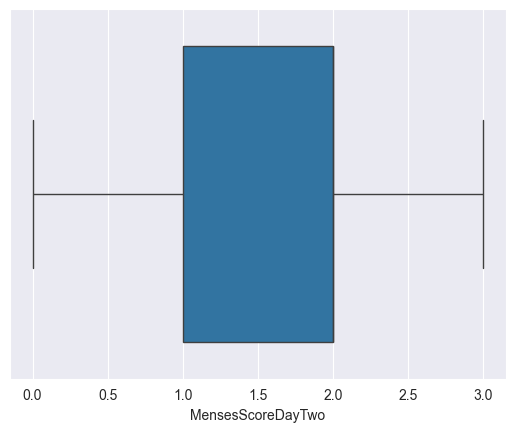

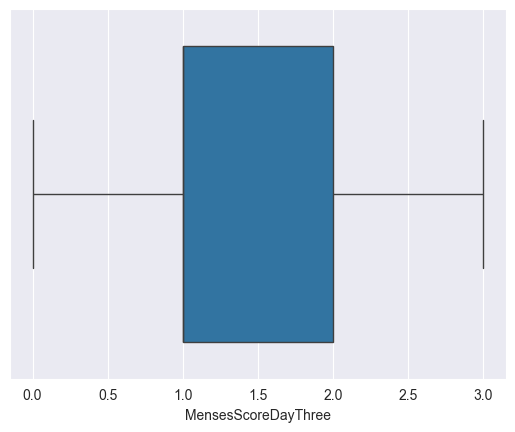

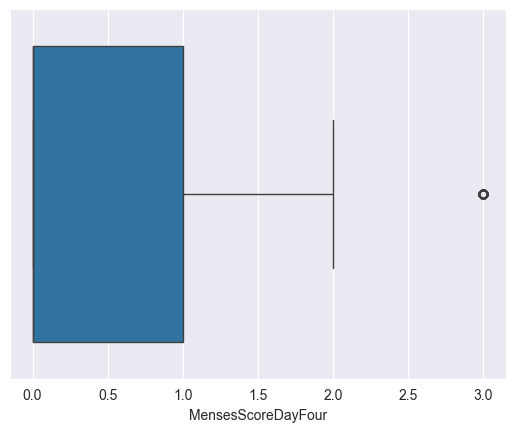

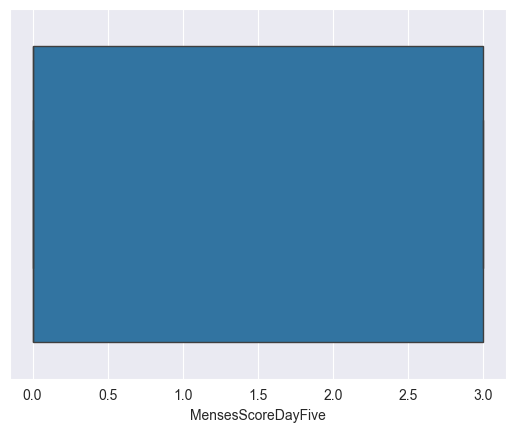

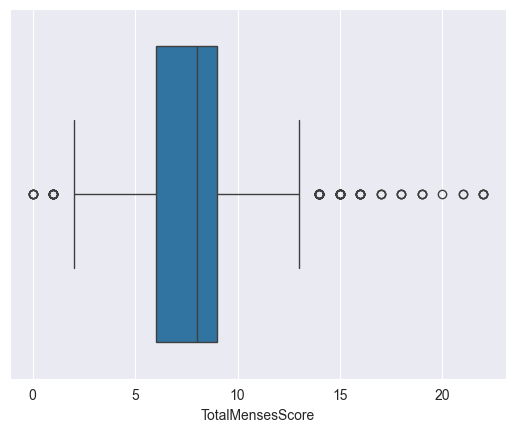

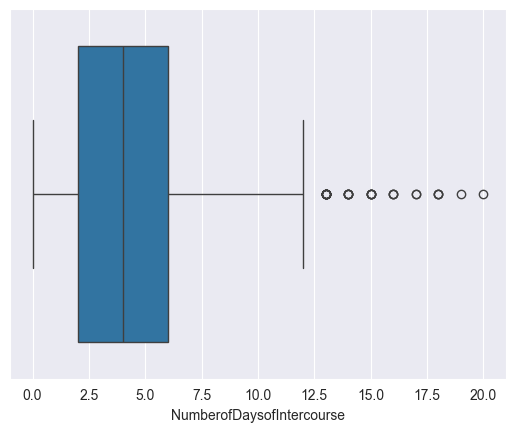

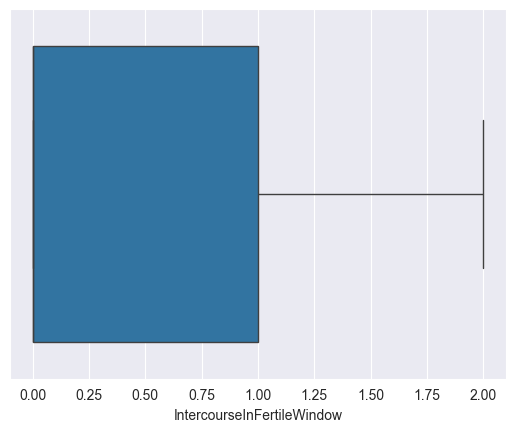

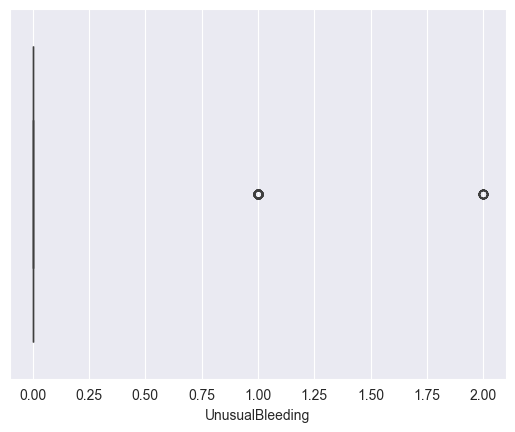

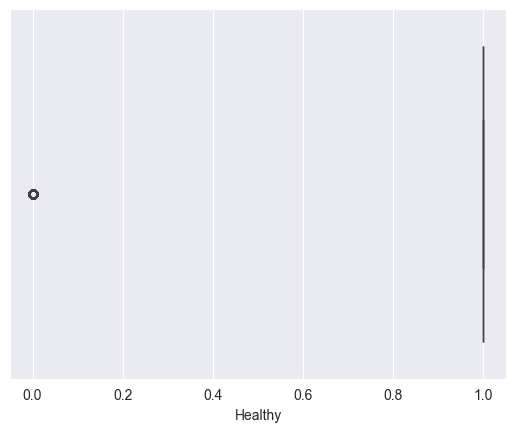

In [76]:
for cols in df.columns:    
    sns.boxplot(data=df[cols] ,orient= "h")
    plt.show()

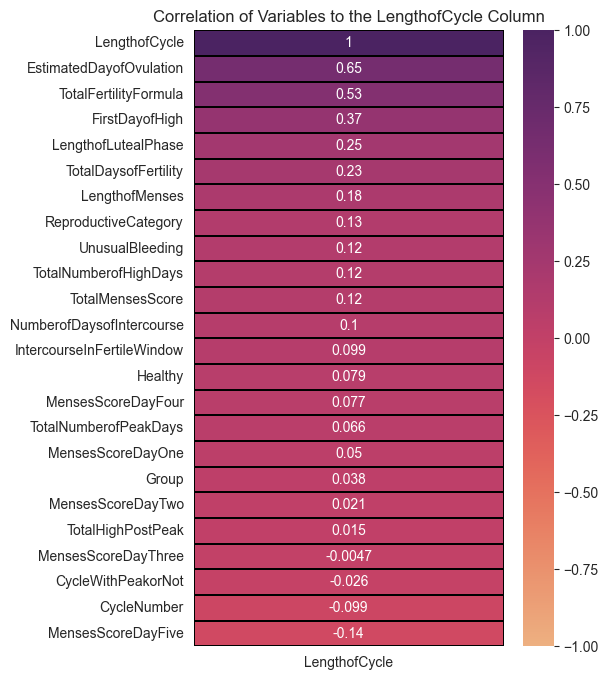

In [90]:
plt.figure(figsize=(5,8))
sns.heatmap(df.corr()['LengthofCycle'].sort_values(ascending=False).to_frame(),
            annot=True, vmin=-1, vmax=1, linewidths=0.3, linecolor='black', cmap= 'flare')
plt.title('Correlation of Variables to the LengthofCycle Column')
plt.show()